In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

In [3]:
train = pd.read_csv("./dataset/dreaddit-train.csv")
test = pd.read_csv("./dataset/dreaddit-test.csv")

In [4]:
print(train.head(), train.shape)

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [5]:
print(test.head(), test.shape)

      id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
0      1.514981e+09            22   -1.238793  ...                    1.0000   
1      1.493348e+09             5    7.684583  ...                    1.4000   
2      1

## TextBlob
* Polarity: float value within -1 to 1. 0: neutral, +1: very positive, -1: very negative
* Subjectivity: float value within 0 to 1. 0: very objective, 1: very subjective

In [6]:
print("Sentiment : ",TextBlob("I feel like nothing will ever get better and there's no point in even trying.").sentiment)

Sentiment :  Sentiment(polarity=0.5, subjectivity=0.5)


In [21]:
print(train.text[0])

He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.


In [24]:
reddits = pd.DataFrame()
reddits['text'] = train.text
reddits['sentiment'] = reddits['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
reddits.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


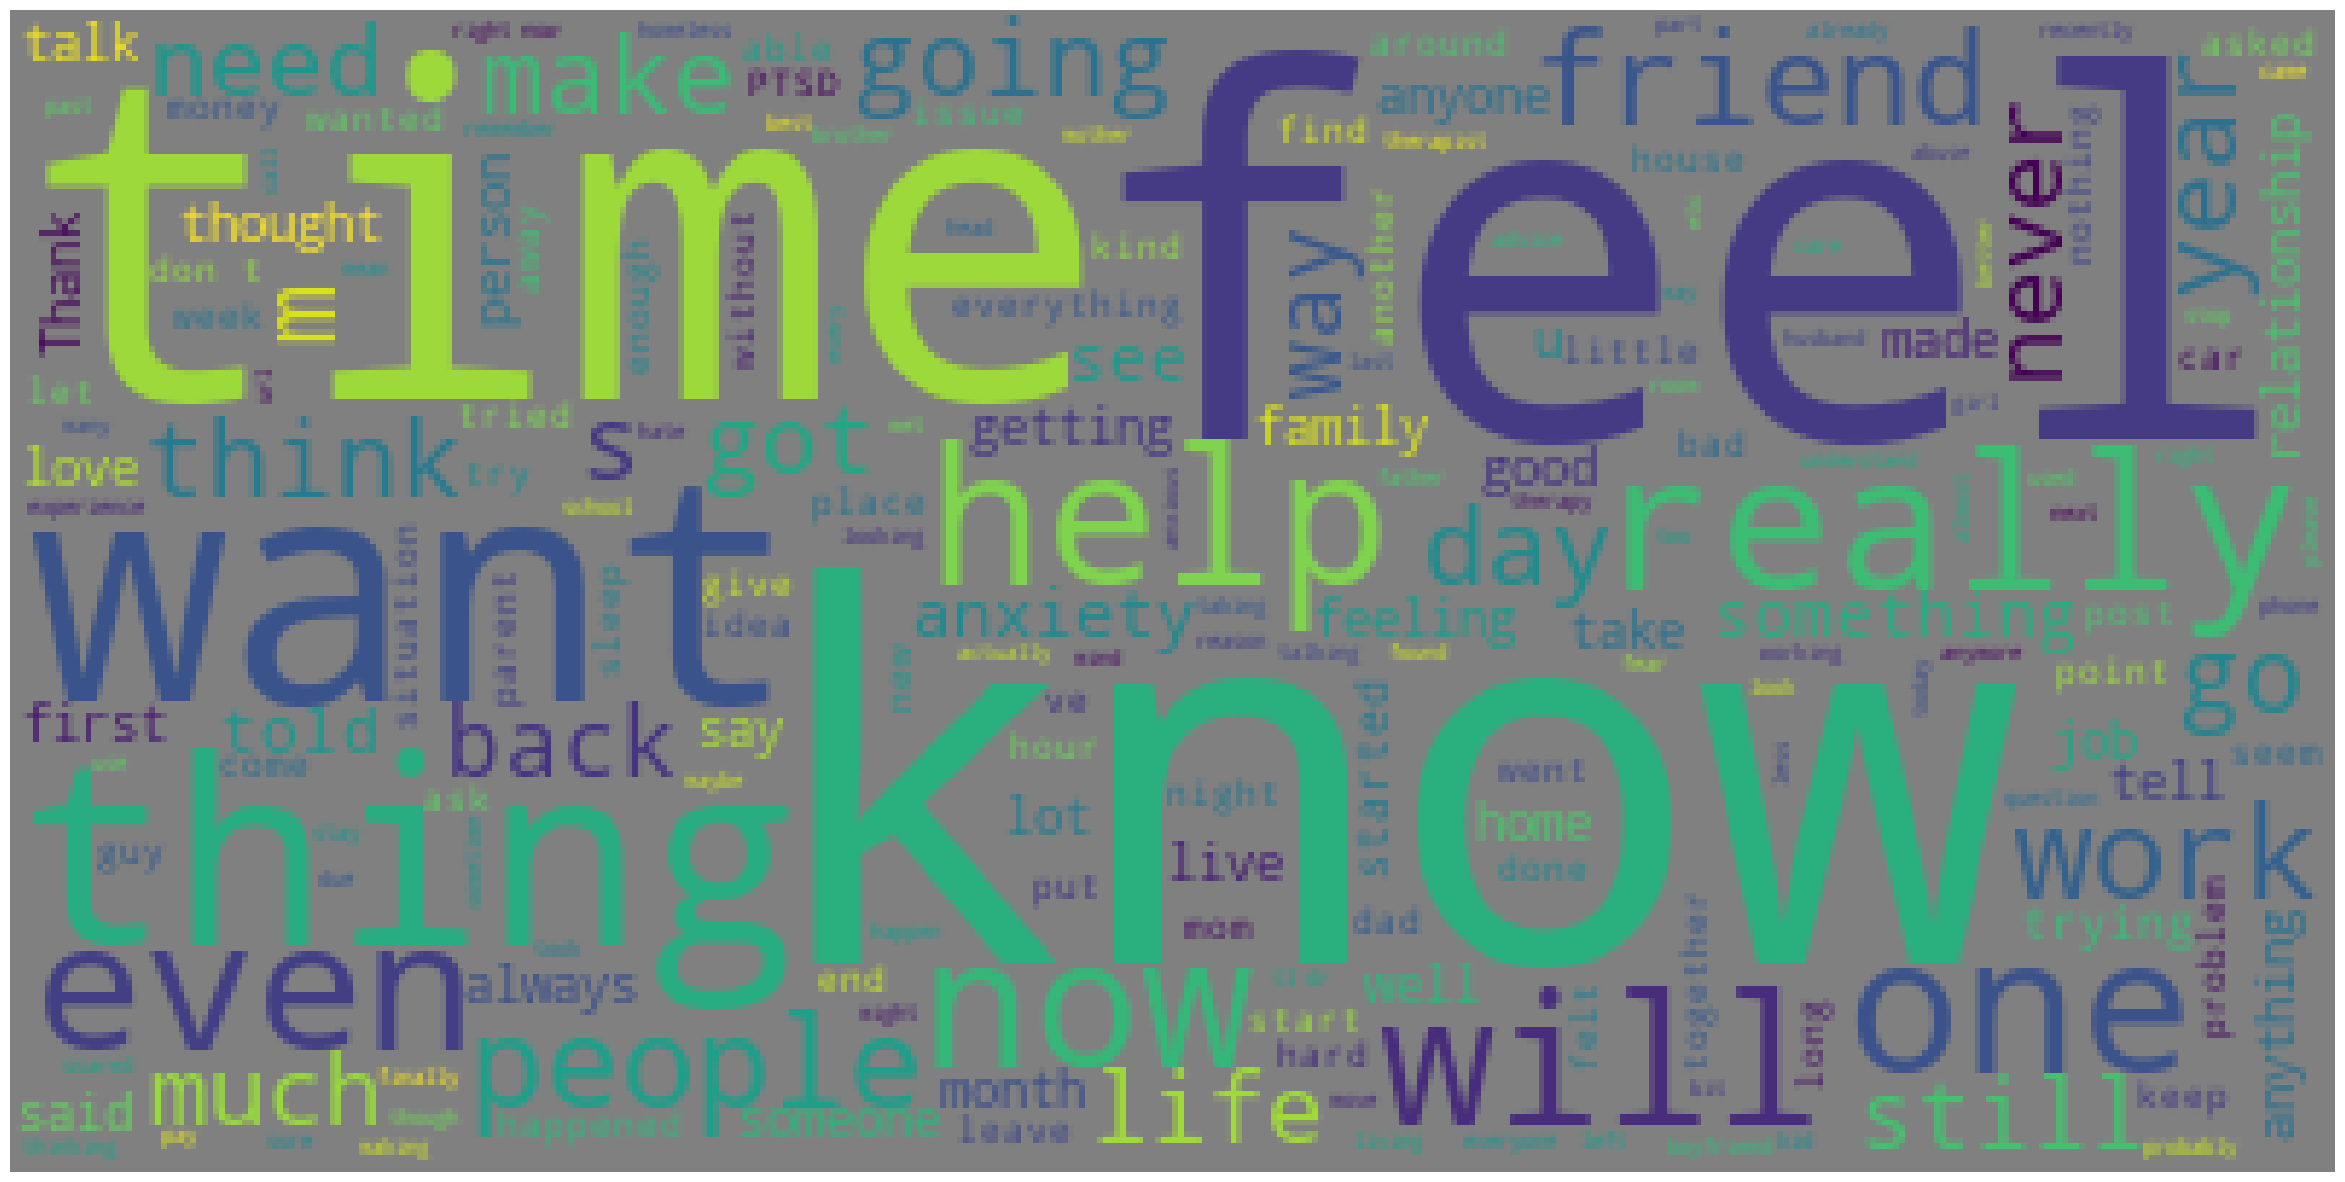

In [28]:
def wc(data,bgcolor):
    plt.figure(figsize=(30,30))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
wc(reddits.text,'grey')